# Einführung in Neuronale Netzwerke

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pylab as plt
import numpy as np

In [4]:
from distutils.version import StrictVersion

In [5]:
import sklearn
print(sklearn.__version__)

assert StrictVersion(sklearn.__version__ ) >= StrictVersion('0.18.1')

0.18.1


In [6]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)

assert StrictVersion(tf.__version__) >= StrictVersion('1.1.0')

1.2.1


In [7]:
import keras
print(keras.__version__)

assert StrictVersion(keras.__version__) >= StrictVersion('2.0.0')

Using TensorFlow backend.


2.0.5


## Iris mit Neuronalen Netzwerken

## Das künstliche Neuron
![Das künstliche Neuron](https://djcordhose.github.io/ai/img/sketch/neuron.jpg "Das künstliche Neuron")

---

# Hands-On
## Erzeuge eine Python-Implementierung eines Neurons mit zwei Eingabevariablen ohne Activation Funktion
* Denke die Werte für w1, w2 und den Bias aus
* Kannst du eine Skizze des Graphs der Funktion mit x1 und x2 an den Achsen erstellen?
* Was ist das für eine Funktion?

---

In [ ]:
%load https://djcordhose.github.io/ai/fragments/neuron.py

### Wir probieren unser Modell mit dem Iris Dataset

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.data[0]

array([ 5.1,  3.5,  1.4,  0.2])

In [37]:
neuron_no_activation(5.1, 3.5)

-10.399999999999999

### Wie sollen wir das interpretieren? Damit können wir nicht viel anfangen

### Activation Functions

In [16]:
def centerAxis(uses_negative=False):
    # http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    if uses_negative:
        ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

### Sigmoid

In [18]:
def np_sigmoid(X):
    return 1 / (1 + np.exp(X * -1))

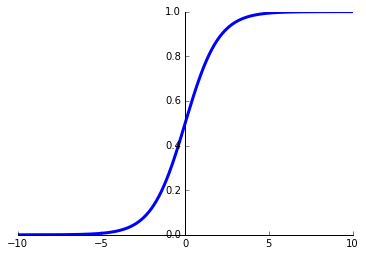

In [19]:
x = np.arange(-10,10,0.01)
y = np_sigmoid(x)

centerAxis()
plt.plot(x,y,lw=3)

### Relu

In [20]:
def np_relu(x):
    return np.maximum(0, x)

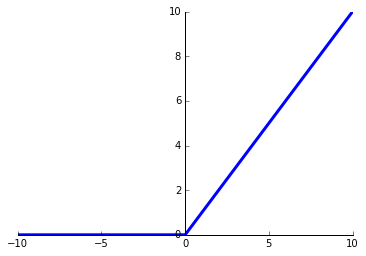

In [21]:
x = np.arange(-10, 10, 0.01)
y = np_relu(x)

centerAxis()
plt.plot(x,y,lw=3)

### Das komplette Neuron

In [24]:
w0 = 3
w1 = -4
w2 = 2

import math as math
def sigmoid(x):
    return 1 / (1 + math.exp(x * -1))

def neuron(x1, x2):
    sum = w0 + x1 * w1 + x2 * w2
    return sigmoid(sum)

In [25]:
neuron(5.1, 3.5)

3.043155690056538e-05

## Unser erste Neuronales Netz mit Keras
![Neuron zu Netz](https://djcordhose.github.io/ai/img/sketch/neuron_to_layers.jpg "Neuron zu Netz")

In [26]:
from keras.layers import Input
inputs = Input(shape=(4, ))

In [27]:
from keras.layers import Dense
fc = Dense(3)(inputs)

In [28]:
from keras.models import Model
model = Model(input=inputs, output=fc)

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[ 3.23584461, -1.13255548, -3.45655632]], dtype=float32)

![Fully Connected](https://djcordhose.github.io/ai/img/sketch/fc_nn.jpg "Fully Connected")

In [32]:
inputs = Input(shape=(4, ))
fc = Dense(3)(inputs)
predictions = Dense(3, activation='softmax')(fc)
model = Model(input=inputs, output=predictions)

In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 12        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[ 0.09841966,  0.87404394,  0.02753644]], dtype=float32)

# Training

In [36]:
X = np.array(iris.data)
y = np.array(iris.target)
X.shape, y.shape

((150, 4), (150,))

In [39]:
y[100]

2

In [40]:
# tiny little pieces of feature engeneering
from keras.utils.np_utils import to_categorical

num_categories = 3

y = to_categorical(y, num_categories)

In [41]:
y[100]

array([ 0.,  0.,  1.])

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [ ]:
# !rm -r tf_log
# tb_callback = keras.callbacks.TensorBoard(log_dir='./tf_log')

# https://keras.io/callbacks/#tensorboard
# To start tensorboard
# tensorboard --logdir=/mnt/c/Users/olive/Development/ml/tf_log
# open http://localhost:6006

In [44]:
# %time model.fit(X_train, y_train, epochs=500, validation_split=0.3, callbacks=[tb_callback])
%time model.fit(X_train, y_train, epochs=500, validation_split=0.3)

Train on 84 samples, validate on 36 samples
Epoch 1/500
84/84 [==============================] - 0s - loss: 1.6569 - acc: 0.3690 - val_loss: 2.0478 - val_acc: 0.2222
Epoch 2/500
84/84 [==============================] - 0s - loss: 1.6029 - acc: 0.3690 - val_loss: 1.9716 - val_acc: 0.2222
Epoch 3/500
84/84 [==============================] - 0s - loss: 1.5480 - acc: 0.3690 - val_loss: 1.8985 - val_acc: 0.2222
Epoch 4/500
84/84 [==============================] - 0s - loss: 1.4995 - acc: 0.3690 - val_loss: 1.8268 - val_acc: 0.2222
Epoch 5/500
84/84 [==============================] - 0s - loss: 1.4511 - acc: 0.3690 - val_loss: 1.7574 - val_acc: 0.2222
Epoch 6/500
84/84 [==============================] - 0s - loss: 1.4036 - acc: 0.3690 - val_loss: 1.6917 - val_acc: 0.2222
Epoch 7/500
84/84 [==============================] - 0s - loss: 1.3624 - acc: 0.3690 - val_loss: 1.6280 - val_acc: 0.2222
Epoch 8/500
84/84 [==============================] - 0s - loss: 1.3182 - acc: 0.3690 - val_loss: 1.568

84/84 [==============================] - ETA: 0s - loss: 0.5301 - acc: 0.968 - 0s - loss: 0.5502 - acc: 0.9286 - val_loss: 0.5547 - val_acc: 0.9444
Epoch 128/500
84/84 [==============================] - 0s - loss: 0.5478 - acc: 0.9286 - val_loss: 0.5531 - val_acc: 0.9167
Epoch 129/500
84/84 [==============================] - ETA: 0s - loss: 0.5464 - acc: 0.937 - 0s - loss: 0.5453 - acc: 0.9286 - val_loss: 0.5515 - val_acc: 0.9167
Epoch 130/500
84/84 [==============================] - ETA: 0s - loss: 0.5672 - acc: 0.906 - 0s - loss: 0.5427 - acc: 0.9286 - val_loss: 0.5501 - val_acc: 0.9167
Epoch 131/500
84/84 [==============================] - ETA: 0s - loss: 0.5083 - acc: 0.937 - 0s - loss: 0.5403 - acc: 0.9286 - val_loss: 0.5487 - val_acc: 0.9167
Epoch 132/500
84/84 [==============================] - 0s - loss: 0.5379 - acc: 0.9524 - val_loss: 0.5473 - val_acc: 0.9167
Epoch 133/500
84/84 [==============================] - 0s - loss: 0.5355 - acc: 0.9524 - val_loss: 0.5452 - val_acc: 0

84/84 [==============================] - 0s - loss: 0.3450 - acc: 0.9881 - val_loss: 0.3794 - val_acc: 0.8889
Epoch 256/500
84/84 [==============================] - 0s - loss: 0.3440 - acc: 0.9881 - val_loss: 0.3801 - val_acc: 0.8889
Epoch 257/500
84/84 [==============================] - 0s - loss: 0.3428 - acc: 0.9881 - val_loss: 0.3793 - val_acc: 0.8889
Epoch 258/500
84/84 [==============================] - ETA: 0s - loss: 0.3816 - acc: 1.000 - 0s - loss: 0.3418 - acc: 0.9881 - val_loss: 0.3789 - val_acc: 0.8889
Epoch 259/500
84/84 [==============================] - ETA: 0s - loss: 0.3556 - acc: 1.000 - 0s - loss: 0.3408 - acc: 0.9881 - val_loss: 0.3771 - val_acc: 0.8889
Epoch 260/500
84/84 [==============================] - 0s - loss: 0.3396 - acc: 0.9881 - val_loss: 0.3759 - val_acc: 0.8889
Epoch 261/500
84/84 [==============================] - 0s - loss: 0.3386 - acc: 0.9881 - val_loss: 0.3750 - val_acc: 0.8889
Epoch 262/500
84/84 [==============================] - 0s - loss: 0.33

84/84 [==============================] - 0s - loss: 0.2825 - acc: 0.9881 - val_loss: 0.3289 - val_acc: 0.9167
Epoch 320/500
84/84 [==============================] - 0s - loss: 0.2818 - acc: 0.9881 - val_loss: 0.3261 - val_acc: 0.9167
Epoch 321/500
84/84 [==============================] - 0s - loss: 0.2807 - acc: 0.9881 - val_loss: 0.3251 - val_acc: 0.9167
Epoch 322/500
84/84 [==============================] - 0s - loss: 0.2798 - acc: 0.9881 - val_loss: 0.3236 - val_acc: 0.9167
Epoch 323/500
84/84 [==============================] - 0s - loss: 0.2794 - acc: 0.9881 - val_loss: 0.3216 - val_acc: 0.9167
Epoch 324/500
84/84 [==============================] - 0s - loss: 0.2781 - acc: 0.9881 - val_loss: 0.3216 - val_acc: 0.9167
Epoch 325/500
84/84 [==============================] - 0s - loss: 0.2774 - acc: 0.9881 - val_loss: 0.3229 - val_acc: 0.9167
Epoch 326/500
84/84 [==============================] - 0s - loss: 0.2764 - acc: 0.9881 - val_loss: 0.3224 - val_acc: 0.9167
Epoch 327/500
84/84 [=

84/84 [==============================] - 0s - loss: 0.1903 - acc: 0.9881 - val_loss: 0.2528 - val_acc: 0.9444
Epoch 447/500
84/84 [==============================] - 0s - loss: 0.1898 - acc: 0.9881 - val_loss: 0.2513 - val_acc: 0.9444
Epoch 448/500
84/84 [==============================] - 0s - loss: 0.1891 - acc: 0.9881 - val_loss: 0.2509 - val_acc: 0.9444
Epoch 449/500
84/84 [==============================] - 0s - loss: 0.1887 - acc: 0.9881 - val_loss: 0.2511 - val_acc: 0.9444
Epoch 450/500
84/84 [==============================] - 0s - loss: 0.1880 - acc: 0.9881 - val_loss: 0.2494 - val_acc: 0.9444
Epoch 451/500
84/84 [==============================] - 0s - loss: 0.1874 - acc: 0.9881 - val_loss: 0.2490 - val_acc: 0.9444
Epoch 452/500
84/84 [==============================] - 0s - loss: 0.1868 - acc: 0.9881 - val_loss: 0.2481 - val_acc: 0.9444
Epoch 453/500
84/84 [==============================] - 0s - loss: 0.1863 - acc: 0.9881 - val_loss: 0.2478 - val_acc: 0.9444
Epoch 454/500
84/84 [=

# Bewertung

In [45]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[  9.82259035e-01,   1.77392866e-02,   1.65961740e-06]], dtype=float32)

In [46]:
X[0], y[0]

(array([ 5.1,  3.5,  1.4,  0.2]), array([ 1.,  0.,  0.]))

In [47]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
train_loss, train_accuracy

 32/120 [=======>......................] - ETA: 0s

(0.18136776983737946, 0.97499999602635701)

In [48]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_loss, test_accuracy

30/30 [==============================] - 0s


(0.19082625210285187, 0.96666663885116577)

---

# Hands-On
## Vollziehe das Notebook bis hier nach und spiele mit den einigen Parametern
* Variiere die Anzahl der Neuronen im Hidden Layer. Wieso geht das überhaupt mit 3 Neuronen
* Ziehe eine weitere Schicht ein
* Kannst du eine Skizze des Graphs der Funktion mit x1 und x2 an den Achsen erstellen?
* Was ist das für eine Funktion?

---

# Stop Here

# Optionaler Teil

## Model im Keras und TensorFlow Format speichern

In [ ]:
model.save('nn-iris.hdf5')

## Export as raw tf model

* https://tensorflow.github.io/serving/serving_basic.html
* https://github.com/tensorflow/serving/blob/master/tensorflow_serving/example/mnist_saved_model.py

In [ ]:
import os
from keras import backend as K

In [ ]:
K.set_learning_phase(0)

In [ ]:
sess = K.get_session()

In [ ]:
!rm -r tf

In [ ]:
tf.app.flags.DEFINE_integer('model_version', 1, 'version number of the model.')
tf.app.flags.DEFINE_string('work_dir', '/tmp', 'Working directory.')
FLAGS = tf.app.flags.FLAGS

In [ ]:
export_path_base = 'tf'
export_path = os.path.join(
  tf.compat.as_bytes(export_path_base),
  tf.compat.as_bytes(str(FLAGS.model_version)))

In [ ]:
classification_inputs = tf.saved_model.utils.build_tensor_info(model.input)
classification_outputs_scores = tf.saved_model.utils.build_tensor_info(model.output)

In [ ]:
from tensorflow.python.saved_model.signature_def_utils_impl import build_signature_def, predict_signature_def

In [ ]:
signature = predict_signature_def(inputs={'inputs': model.input},
                                  outputs={'scores': model.output})

In [ ]:
builder = tf.saved_model.builder.SavedModelBuilder(export_path)

In [ ]:
builder.add_meta_graph_and_variables(
      sess, 
     tags=[tf.saved_model.tag_constants.SERVING],
      signature_def_map={
          tf.saved_model.signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY: signature
      })

In [ ]:
builder.save()

In [ ]:
!ls -lhR tf

## Dieses Tensorflow Modell kann man bei Google Cloud ML hochladen und für Berechnungen nutzen

In [ ]:
# cd tf
# gsutil cp -R 1 gs://irisnn
# create model and version at https://console.cloud.google.com/mlengine
# gcloud ml-engine predict --model=irisnn --json-instances=./sample_iris.json
# SCORES
# [0.9954029321670532, 0.004596732556819916, 3.3544753819114703e-07]